<a href="https://colab.research.google.com/github/mimahb/California-housing-prediction./blob/main/Californiahousingprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving housing.csv to housing (6).csv
dataset preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Basic info:
<class 

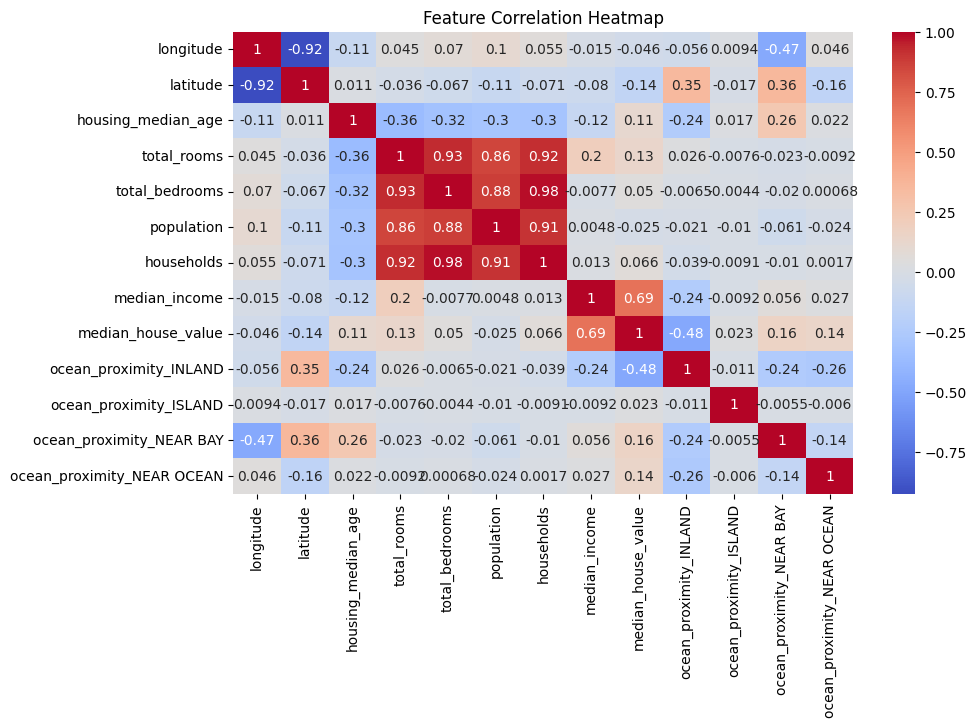

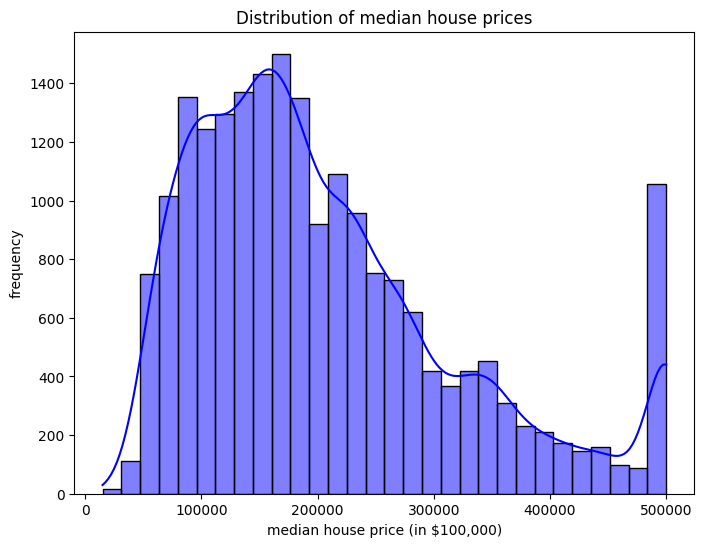

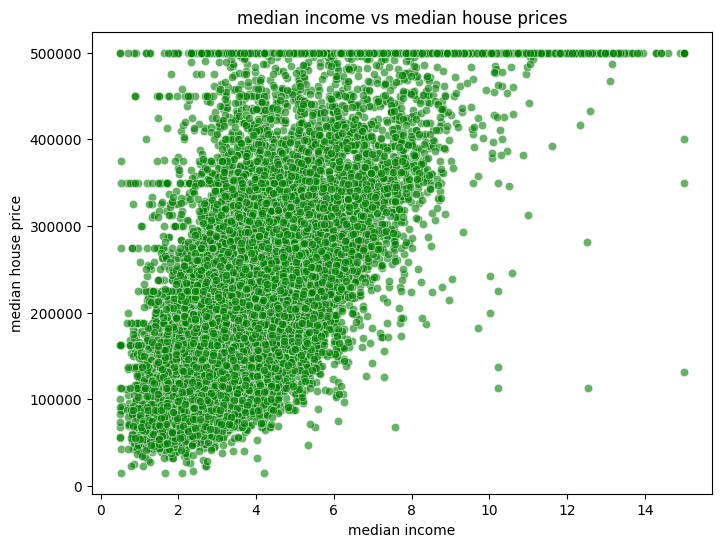


Linear Regression performance: 
RMSE: 69297.7166911303
R-squared: 0.6488402154431994

Random forest performance:
RMSE: 48777.78774573444
R-squared: 0.6488402154431994


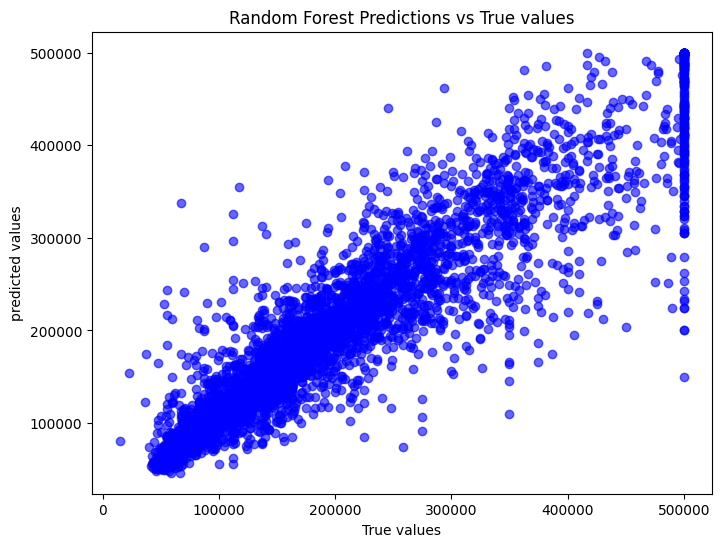

<ipython-input-7-23d7910ed6f1>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


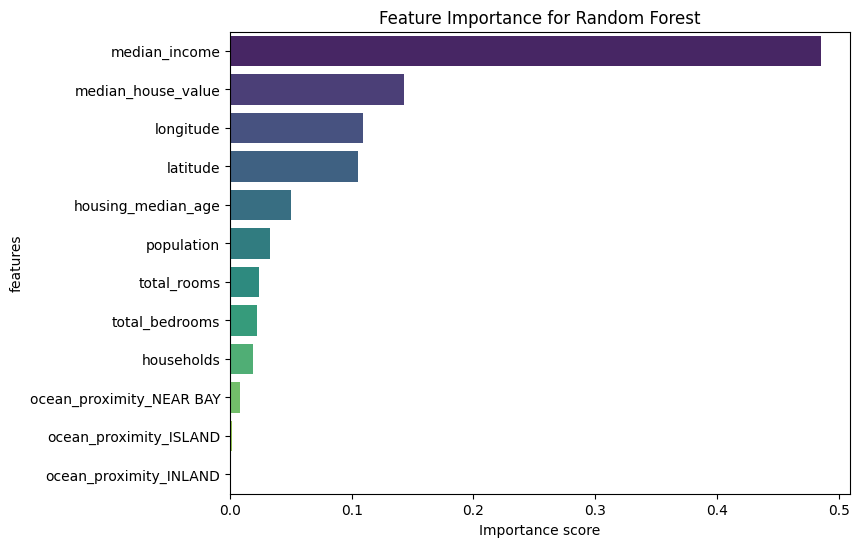

In [7]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#upload csv file
from google.colab import files
uploaded = files.upload()

#display the file/load the data
data = pd.read_csv("housing.csv")

#explore the data
print("dataset preview:")
print(data.head())

print("\nBasic info:")
print(data.info())

print("\nDataset summary:")
print(data.describe())

print("\nmissing values:")
print(data.isnull().sum())

data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

#visualize correlation between the features and the target value using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#visualizing the distribution of the target variable(median_house_value)
plt.figure(figsize=(8, 6))
sns.histplot(data['median_house_value'], kde=True, bins=30, color='blue')
plt.title("Distribution of median house prices")
plt.xlabel("median house price (in $100,000)")
plt.ylabel("frequency")
plt.show()

#visualizing median income vs median house prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['median_income'], y=data['median_house_value'], alpha=0.6, color='green')
plt.title("median income vs median house prices")
plt.xlabel('median income')
plt.ylabel('median house price')
plt.show()


#data preprocessing,
#drop any missing values
data= data.dropna()

#split the dataset in features x and target y
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

#splitting into training and testing sets (80/20 splits)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#feature scaling using standar scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#model building
#linear regression
Ir_model = LinearRegression()
Ir_model.fit(x_train, y_train)

#making predictions with linear regression
Ir_predictions = Ir_model.predict(x_test)

#evaluating linearRegression
print("\nLinear Regression performance: ")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, Ir_predictions))}")
print(f"R-squared: {r2_score(y_test, Ir_predictions)}")

#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

#making predictions with random forest
rf_predictions = rf_model.predict(x_test)

#evaluation random forest
print("\nRandom forest performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}")
print(f"R-squared: {r2_score(y_test, Ir_predictions)}")

#visualizing predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue',)
plt.title("Random Forest Predictions vs True values")
plt.xlabel("True values")
plt.ylabel("predicted values")
plt.show()


#visualising feature importance for random forest
feature_importance = pd.Series(rf_model.feature_importances_, index=data.columns[:-1]). sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance score")
plt.ylabel("features")
plt.show()








